In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files
uploaded = files.upload()

Saving fake_reg.csv to fake_reg.csv


In [6]:
df = pd.read_csv('fake_reg.csv')

In [7]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [8]:
from sklearn.model_selection import train_test_split

In [24]:
x = df[['feature1', 'feature2']].values

In [25]:
y = df['price'].values

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state = 42)

In [29]:
x_test.shape

(300, 2)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Create Neural Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
# model = Sequential([Dense(4, activation = 'relu'), Dense(2, activa#tion ='relu'),
                    Dense(1)])

In [19]:
model = Sequential()
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1)) # output layer
model.compile(optimizer='rmsprop', loss='mse')

In [31]:
model.fit(x = x_train, y = y_train, epochs=250, verbose = 1)

Epoch 1/250
22/22 - 0s - loss: 256736.9219
Epoch 2/250
22/22 - 0s - loss: 256591.6562
Epoch 3/250
22/22 - 0s - loss: 256380.7969
Epoch 4/250
22/22 - 0s - loss: 256123.0625
Epoch 5/250
22/22 - 0s - loss: 255755.2500
Epoch 6/250
22/22 - 0s - loss: 255337.0938
Epoch 7/250
22/22 - 0s - loss: 254861.7344
Epoch 8/250
22/22 - 0s - loss: 254320.3125
Epoch 9/250
22/22 - 0s - loss: 253709.3750
Epoch 10/250
22/22 - 0s - loss: 253029.0781
Epoch 11/250
22/22 - 0s - loss: 252279.8438
Epoch 12/250
22/22 - 0s - loss: 251457.4688
Epoch 13/250
22/22 - 0s - loss: 250561.8906
Epoch 14/250
22/22 - 0s - loss: 249596.9375
Epoch 15/250
22/22 - 0s - loss: 248567.8594
Epoch 16/250
22/22 - 0s - loss: 247459.8125
Epoch 17/250
22/22 - 0s - loss: 246257.0000
Epoch 18/250
22/22 - 0s - loss: 244959.5156
Epoch 19/250
22/22 - 0s - loss: 243557.6406
Epoch 20/250
22/22 - 0s - loss: 242030.9531
Epoch 21/250
22/22 - 0s - loss: 240389.1875
Epoch 22/250
22/22 - 0s - loss: 238606.2812
Epoch 23/250
22/22 - 0s - loss: 236693.46

In [32]:
loss_df = pd.DataFrame(model.history.history)

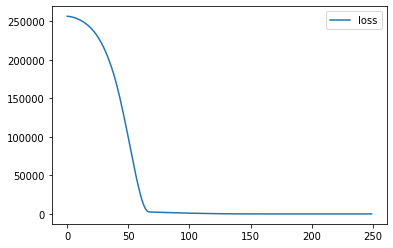

In [33]:
loss_df.plot()

In [34]:
# Evaluate Model

In [35]:
model.evaluate(x_test, y_test, verbose = 0)  # it returns loss in particular metric i.e 25 mse

25.032339096069336

In [36]:
model.evaluate(x_train, y_train, verbose = 0)

23.74994468688965

In [37]:
test_pred = model.predict(x_test)

In [38]:
test_pred

array([[405.37332],
       [623.8188 ],
       [592.3854 ],
       [572.4535 ],
       [366.65424],
       [579.41705],
       [515.2237 ],
       [459.244  ],
       [549.4521 ],
       [447.64667],
       [612.05475],
       [549.1693 ],
       [419.1951 ],
       [408.954  ],
       [651.55774],
       [437.41486],
       [508.6378 ],
       [660.23395],
       [662.8938 ],
       [565.76935],
       [334.24185],
       [444.9523 ],
       [382.5855 ],
       [378.81546],
       [566.82275],
       [610.8541 ],
       [532.58685],
       [427.96536],
       [655.74567],
       [414.17758],
       [442.75784],
       [485.2834 ],
       [438.52875],
       [682.175  ],
       [424.8665 ],
       [417.7764 ],
       [502.10995],
       [550.6903 ],
       [509.9023 ],
       [395.42145],
       [618.86884],
       [416.72574],
       [604.7139 ],
       [446.08835],
       [502.1595 ],
       [581.9702 ],
       [669.33057],
       [490.56747],
       [318.59027],
       [485.58197],


In [39]:
test_pred = pd.Series(test_pred.reshape(300,))
pred_df = pd.DataFrame(y_test, columns = ['Test_True_Y'])

In [40]:
pred_df = pd.concat([pred_df, test_pred], axis = 1)

In [41]:
pred_df.columns = ['Test_True_Y', 'Model Predictions']

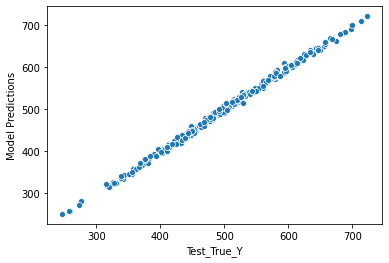

In [46]:
sns.scatterplot(x = 'Test_True_Y', y = 'Model Predictions',data=pred_df, markers='x')

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
mean_absolute_error(pred_df['Test_True_Y'], pred_df['Model Predictions'])

4.007814807589008

In [49]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [51]:
mean_squared_error(pred_df['Test_True_Y'], pred_df['Model Predictions'])**0.5

5.003234544254452

In [52]:
new_gem = [[998, 1000]]

In [56]:
new_gem = scaler.transform(new_gem)

In [57]:
model.predict(new_gem)

array([[419.7727]], dtype=float32)

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model.save('my_gem_model.h5')

In [60]:
later_model = load_model('my_gem_model.h5')

In [61]:
later_model.predict(new_gem)

array([[419.7727]], dtype=float32)